In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn import linear_model

In [73]:
df = pd.read_csv("http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt", delimiter = '\t')

In [74]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [75]:
df['Height'] = df['Height'] * 2.54
df['Father'] = df['Father'] * 2.54
df['Mother'] = df['Mother'] * 2.54

In [76]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.39,170.18,M,185.928,4
1,1,199.39,170.18,F,175.768,4
2,1,199.39,170.18,F,175.260,4
3,1,199.39,170.18,F,175.260,4
4,2,191.77,168.91,M,186.690,4


In [77]:
print("There are " + str(df.isnull().sum(axis=0).sum()) + " missing values.")

There are 0 missing values.


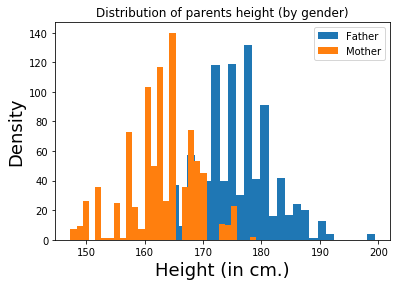

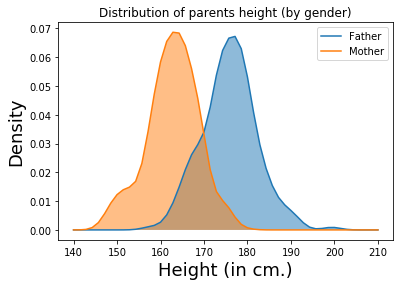

In [78]:
#Histogram
plt.hist(df['Father'], bins = 30, label="Father")
plt.hist(df['Mother'], bins = 30, label="Mother")
plt.ylabel("Density", fontsize=18)
plt.xlabel('Height (in cm.)', fontsize=18)
plt.title("Distribution of parents height (by gender)")
plt.legend()
plt.show()

#Gaussian kernel
plt.figure()
kde_father = KDEUnivariate(df['Father'])
kde_father.fit(bw=2, kernel='gau')
x_grid = np.linspace(140, 210)
pdf_est_father = kde_father.evaluate(x_grid)

kde_mother = KDEUnivariate(df['Mother'])
kde_mother.fit(bw=2, kernel='gau')
x_grid = np.linspace(140, 210)
pdf_est_mother = kde_mother.evaluate(x_grid)

plt.plot(x_grid, pdf_est_father, label='Father')
plt.fill_between(x_grid, 0, pdf_est_father, alpha=0.5)
plt.plot(x_grid, pdf_est_mother, label='Mother')
plt.fill_between(x_grid, 0, pdf_est_mother, alpha=0.5)

plt.ylabel('Density', fontsize=18)
plt.xlabel('Height (in cm.)', fontsize=18)
plt.title("Distribution of parents height (by gender)")
plt.legend()
plt.show()

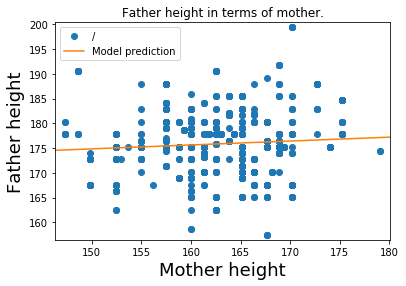

In [79]:
plt.figure()
y = df['Father']
X = df[['Mother']]
plt.plot(X,y,"o", label="/")
plt.ylabel('Father height', fontsize=18)
plt.xlabel('Mother height', fontsize=18)
plt.title("Father height in terms of mother.")
plt.ylim([df['Father'].min()-1, df['Father'].max()+1])
plt.xlim([df['Mother'].min()-1, df['Mother'].max()+1])

skl_lm = linear_model.LinearRegression(fit_intercept=True)
skl_lm.fit(X, y)
plt.plot(x_grid, skl_lm.predict(x_grid.reshape(x_grid.shape[0], 1)), '-', label='Model prediction')
plt.legend()
plt.show()

In [80]:
print(skl_lm.score(X, y))

0.005426474934620118


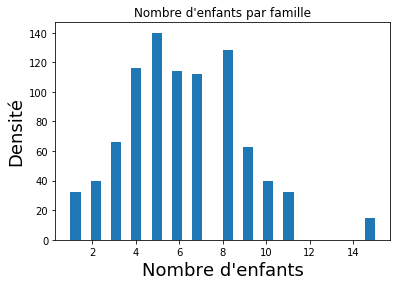

In [81]:
plt.hist(df['Kids'], bins = 30)
plt.xlabel("Nombre d'enfants", fontsize=18)
plt.ylabel("Densité",fontsize=18)
plt.title("Nombre d'enfants par famille")
plt.show()

In [82]:
df['MidParent'] = (df['Father'] * 1.08 + df['Mother'])/ 2

In [83]:
df.head()

,Family,Father,Mother,Gender,Height,Kids,MidParent
0,1,199.39,170.18,M,185.928,4,192.7606
1,1,199.39,170.18,F,175.768,4,192.7606
2,1,199.39,170.18,F,175.260,4,192.7606
3,1,199.39,170.18,F,175.260,4,192.7606
4,2,191.77,168.91,M,186.690,4,188.0108


In [91]:
X0 = df[['MidParent']]
y = df['Height']
skl_lm = linear_model.LinearRegression()
skl_lm.fit(X0, y)
theta0 = skl_lm.intercept_
theta1 = skl_lm.coef_[0]
y_mean=y.mean()
X0_mean = (X0.mean(axis=0)).squeeze()
X0_var = X0.var(ddof=0).squeeze()
y_var = y.var(ddof=0)
theta1_manual = ((X0.squeeze() - X0_mean) * (y - y_mean)).mean() / X0_var
theta0_manual = y_mean - theta1_manual * X0_mean
print('Are the two computations of theta1 the same? This is {} and theta1={}'.format(np.isclose(theta1, theta1_manual),theta1))
print('Are the two computations of theta0 the same? This is {} and theta0={}'.format(np.isclose(theta0, theta1_manual),theta0))

Are the two computations of theta1 the same? This is True and theta1=0.6441901863727933
Are the two computations of theta0 the same? This is False and theta0=55.971160680575835


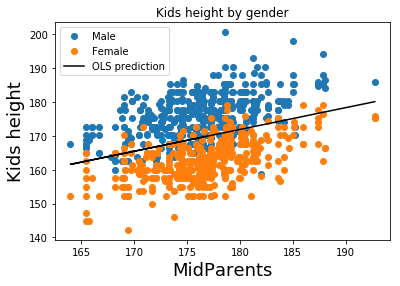

In [98]:
male = df['Gender'] == "M"
female = df['Gender'] == "F"
plt.plot(df['MidParent'][male], y[male], 'o', label="Male")
plt.plot(df['MidParent'][female], y[female], 'o', label="Female")
plt.plot(X0, skl_lm.predict(X0), label='OLS prediction', c='k')
plt.title("Kids height by gender")
plt.xlabel('MidParents', fontsize=18)
plt.ylabel('Kids height', fontsize=18)
plt.legend()
plt.show()

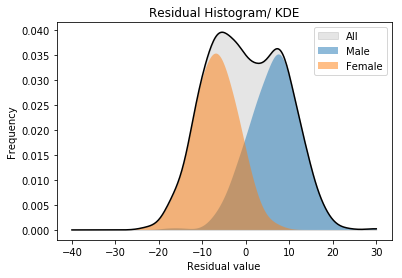

In [103]:
nb_f = float(female.sum())
nb_m = float(male.sum())
alpha_f = nb_f/(nb_f + nb_m)
alpha_m = nb_m/(nb_f + nb_m)

plt.figure()
residual = y - skl_lm.predict(X0)
x_grid = np.linspace(-40, 30, num=300)
plt.title('Residual Histogram/ KDE')
plt.xlabel('Residual value')
plt.ylabel('Frequency')

kde_residual = KDEUnivariate(residual)
kde_residual.fit(bw=2, kernel='gau')
pdf_est_residual = kde_residual.evaluate(x_grid)
plt.plot(x_grid, pdf_est_residual, color='k')
plt.fill_between(x_grid, pdf_est_residual, alpha=0.1, color='k', label='All')

kde_residual_m = KDEUnivariate(residual[male])
kde_residual_m.fit(bw=2, kernel='gau')
pdf_est_residual_m = kde_residual_m.evaluate(x_grid)
plt.fill_between(x_grid, alpha_m * pdf_est_residual_m, alpha=0.5,label='Male')

kde_residual_f = KDEUnivariate(residual[female])
kde_residual_f.fit(bw=2, kernel='gau')
pdf_est_residual_f = kde_residual_f.evaluate(x_grid)
plt.fill_between(x_grid, alpha_f * pdf_est_residual_f, alpha=0.5,label='Female')

plt.legend()
plt.show()

In [105]:
skl_lm = linear_model.LinearRegression()
skl_lm.fit(df[['Height']], df['MidParent'])
alpha0 = skl_lm.intercept_
alpha1 = skl_lm.coef_[0]
alpha0_manual = X0_mean + y_mean / X0_mean * X0_var / y_var * (theta0 - y_mean)
alpha1_manual = X0_var / y_var * theta1_manual
print(alpha1)
print(alpha1_manual)

print('Are the two computations of alpha1' +
      ' the same? This is {}'.format(np.isclose(alpha1, alpha1_manual)))

print('Are the two computations of alpha0' +
      ' the same? This is {}'.format(np.isclose(alpha0, alpha0_manual)))

0.1674382970968419
0.16743829709684183
Are the two computations of alpha1 the same? This is True
Are the two computations of alpha0 the same? This is True
